# 7. Lid Driven Cavity Flow
In this notebook we will simulate the flow with a top moving wall. To demonstrate this, we will solve for internal flow in a square cavity by enforcing no-slip at the walls.

In [1]:
using ViscousFlow

In [2]:
using Plots

##Problem specification
Take $Re=100$ for example. We will set the Reynolds number to 100

In [3]:
Re = 100 # Reynolds number

100

##Discretization
Note that the rectangle function used for making the cavity shape requires a specified half length. The immersed boundary projection method for internal flow requires the size of the domain to be at least a step size greater at the boundaries (i.e. half length + Δx).

In [4]:
Δt,Δx = setstepsizes(Re,gridRe=1.0)
halflength=0.5 # to make rectangle with side length of 1
domain_lim=halflength+1.01*Δx; # 1.01 is just an abitrary factor chosen to be greater than 1
xlim, ylim = (-domain_lim,domain_lim),(-domain_lim,domain_lim)

((-0.50505, 0.50505), (-0.50505, 0.50505))

##Cavity Geometry
A square cavity can be created using the $rectangle()$ function with the half length defined above.
The `shifted=true` argument ensures that points are not placed at the corners, where
they have ill-defined normal vectors.

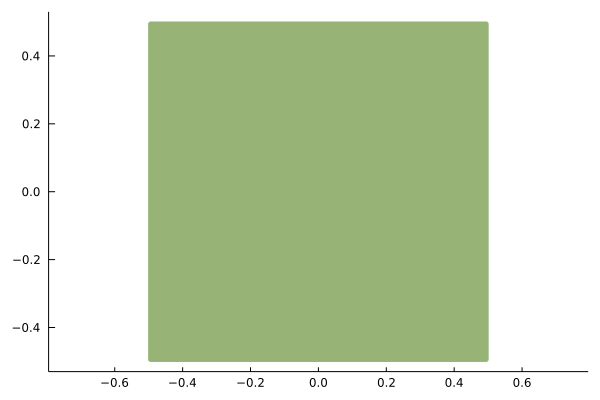

In [5]:
body = Rectangle(halflength,halflength,1.5*Δx,shifted=true)
plot(body)

##Boundary Condition at the moving wall
Assign velocity to the top boundary.

The `LidDrivenCavity()`` function can be used to specify the velocity value at the top wall.

Note : Non-dimensional velocity = 1

In [6]:
m = ViscousFlow.LidDrivenCavity(1.0); # motion type

##Construct the system structure
The last two input `flow_side` and `static_points` must specified so the default setting in the
 `NavierStokes()` function can be overwritten.

`static_points` is set to true because the cavity wall points are not actually moving.

In [7]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,body,m,flow_side = InternalFlow,static_points = true)

Internal flow Navier-Stokes system on a grid of size 208 x 208 and 528 static immersed points
   Static freestream = (0.0, 0.0)
   1 body


Initialize

In [8]:
u0 = newstate(sys)

(Dual nodes in a (nx = 208, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 208, ny = 208), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

Set up integrator

In [9]:
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 208, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 208, ny = 208), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

## Solve

In [10]:
step!(integrator,10)

## Examine
### RE=100, ΔX=0.008
plot for vorticity and streamlines

┌ Info: Saved animation to 
│   fn = /var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_wtmWfY.gif
└ @ Plots /Users/jeff/.julia/packages/Plots/g581z/src/animation.jl:104


Plots.AnimatedGif("/var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_wtmWfY.gif")
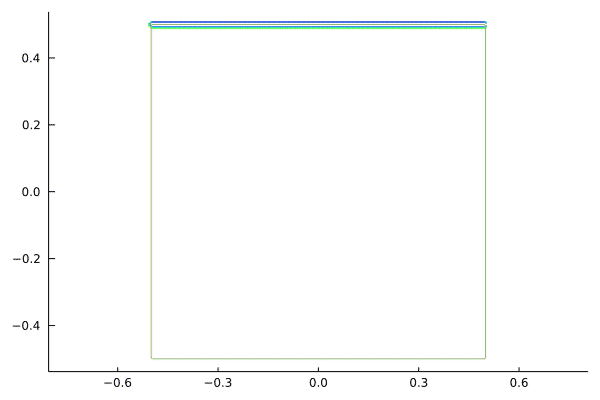

In [11]:
plot(
plot(vorticity(integrator),sys,title="Vorticity (Computed)",clim=(-10,10),color=:turbo,linewidth=1.5,ylim=ylim,fillrange=nothing,levels=-6:0.25:5),
plot(streamfunction(integrator),sys,fillrange=nothing,color=:black,levels=vcat(0.009:0.01:0.11,0.1145,0.11468,0.11477))
   )

sol = integrator.sol;
@gif for (u,t) in zip(sol.u,sol.t)
    plot(vorticity(u,sys,t),sys,clim=(-10,10),levels=range(-10,10,length=30),color=:turbo,fillrange=nothing)
end every 5

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*